In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA


### machine learning

In [2]:
population_clean = pd.read_csv(r'population_clean.csv')

In [3]:
population_clean.sample(5)

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Other people in need of international protection,Stateless persons,...,Others of concern,Total forced displacements,Continent_of_Asylum,Sub_Region_of_Asylum,Continent_of_origin,Sub_Region_of_Origin,Asylum_longitude,Asylum_latitude,Origin_longitude,Origin_latitude
15821,2021,Stateless,XXA,Croatia,HRV,11,0,0,0,2890,...,0,11,Europe,Southern Europe,NaN,NaN,15.5,45.1667,NaN,NaN
33181,2018,Central African Rep.,CAF,Türkiye,TUR,0,19,0,0,0,...,0,19,Asia,Western Asia,Africa,Middle Africa,35.0,39.0000,21.0,7.0
27196,2019,Myanmar,MMR,Hungary,HUN,5,0,0,0,0,...,0,5,Europe,Eastern Europe,Asia,South-Eastern Asia,20.0,47.0000,98.0,22.0
498,2023,Uruguay,URY,Spain,ESP,39,130,0,0,0,...,0,169,Europe,Southern Europe,Americas,South America,-4.0,40.0000,-56.0,-33.0
40809,2016,Armenia,ARM,Portugal,PRT,5,0,0,0,0,...,0,5,Europe,Southern Europe,Asia,Western Asia,-8.0,39.5000,45.0,40.0


In [4]:
population_clean['Continent_of_Asylum'].unique()

array(['Europe', 'Asia', 'Africa', 'Americas', 'Oceania', nan],
      dtype=object)

In [5]:
def get_continent_df(continent):
    df = pd.DataFrame(population_clean[population_clean['Continent_of_origin'] == continent].groupby(['Year'])['Total forced displacements'].sum())
    return df


In [6]:
total = pd.DataFrame(population_clean.groupby(['Year'])['Total forced displacements'].sum())
europe = get_continent_df('Europe')
asia = get_continent_df('Asia')
africa = get_continent_df('Africa')
americas = get_continent_df('Americas')
oceania = get_continent_df('Oceania')


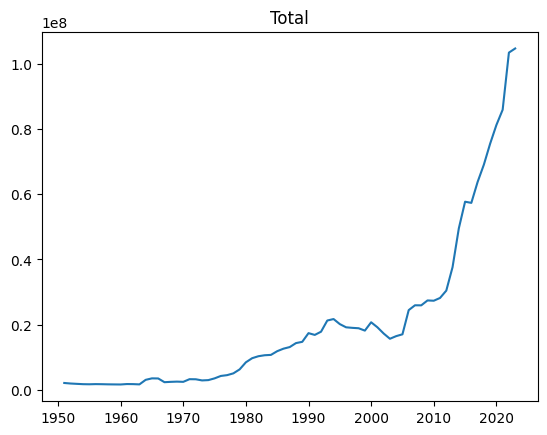

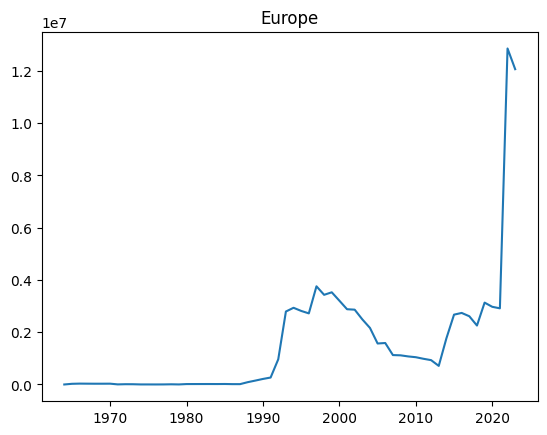

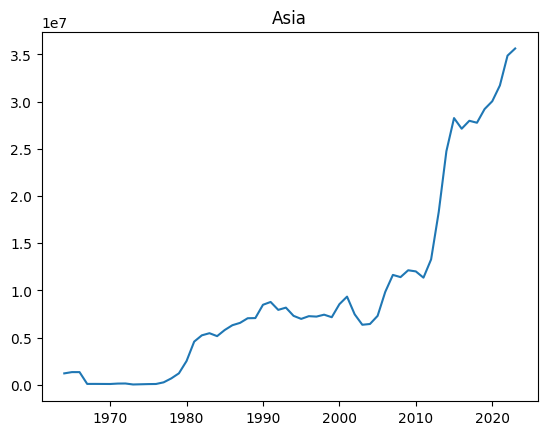

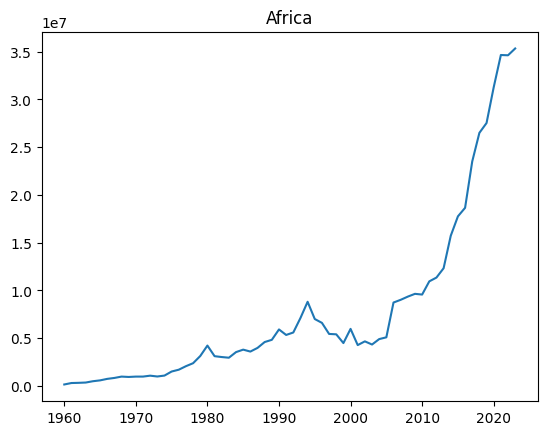

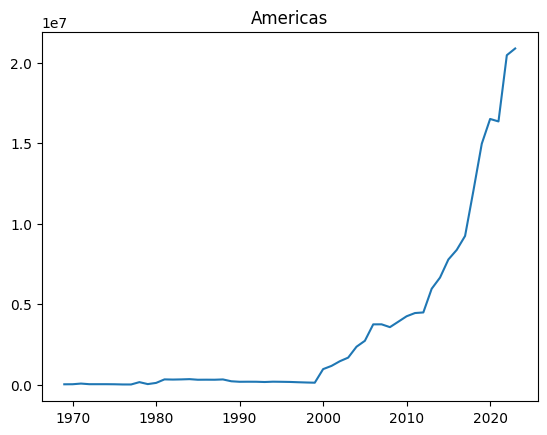

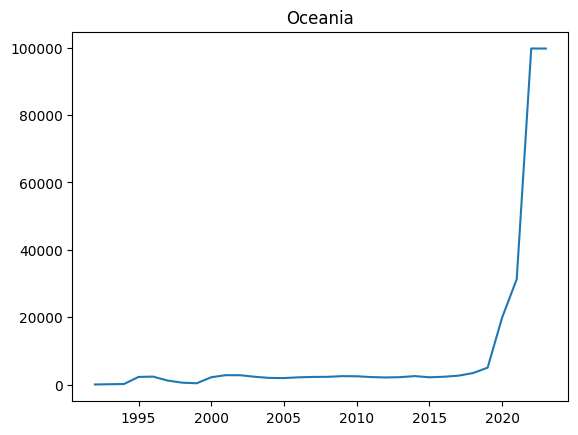

In [7]:
list_cont = [total,europe, asia, africa, americas, oceania]
list_cont_names = ['Total','Europe', 'Asia', 'Africa', 'Americas', 'Oceania']
#una grafica individual para cada continente en list_cont en graficos diferentes
for cont, cont_name in zip(list_cont, list_cont_names):
    plt.plot(cont)
    plt.title(cont_name)
    plt.show()

In [8]:
for cont, cont_name in zip(list_cont, list_cont_names):
    print(cont_name)
    print(f"p-value for zeroth order differencing: {adfuller(cont['Total forced displacements'])[1]}")
    print(f"p-value for first order differencing: {adfuller(cont['Total forced displacements'].diff().dropna())[1]}")
    print(f"p-value for second order differencing: {adfuller(cont['Total forced displacements'].diff().diff().dropna())[1]}")
    print(f"p-value for third order differencing: {adfuller(cont['Total forced displacements'].diff().diff().diff().dropna())[1]}")
   


Total
p-value for zeroth order differencing: 0.9979697704057451
p-value for first order differencing: 0.8165631343323005
p-value for second order differencing: 0.089541503973814
p-value for third order differencing: 1.1250301926537683e-16
Europe
p-value for zeroth order differencing: 0.9652131632559123
p-value for first order differencing: 1.0689968153301142e-12
p-value for second order differencing: 9.936138299895418e-13
p-value for third order differencing: 0.000530534463384124
Asia
p-value for zeroth order differencing: 0.9845554380290048
p-value for first order differencing: 0.058404223807661915
p-value for second order differencing: 9.143212282143706e-09
p-value for third order differencing: 1.0907937964505683e-07
Africa
p-value for zeroth order differencing: 1.0
p-value for first order differencing: 0.64961148323364
p-value for second order differencing: 1.596697681022412e-05
p-value for third order differencing: 4.001585118717496e-10
Americas
p-value for zeroth order differencin

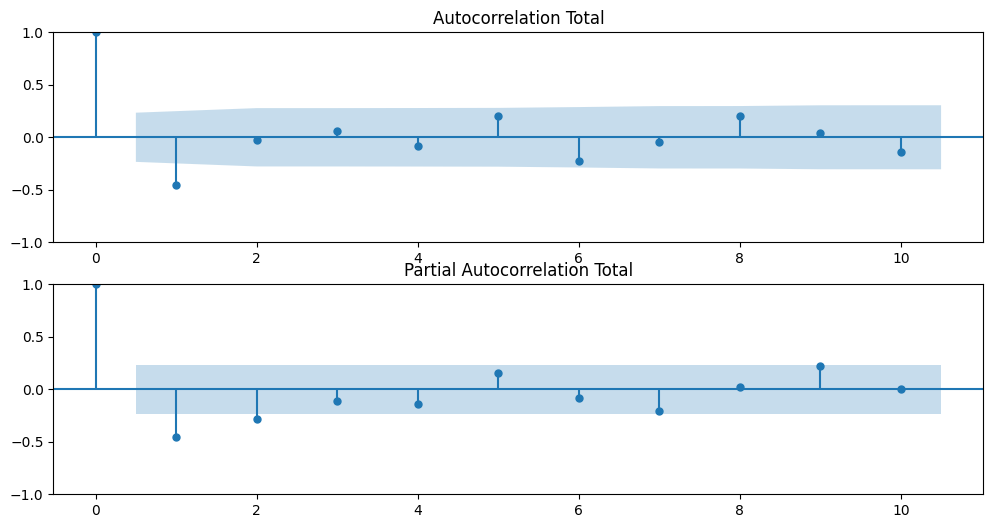

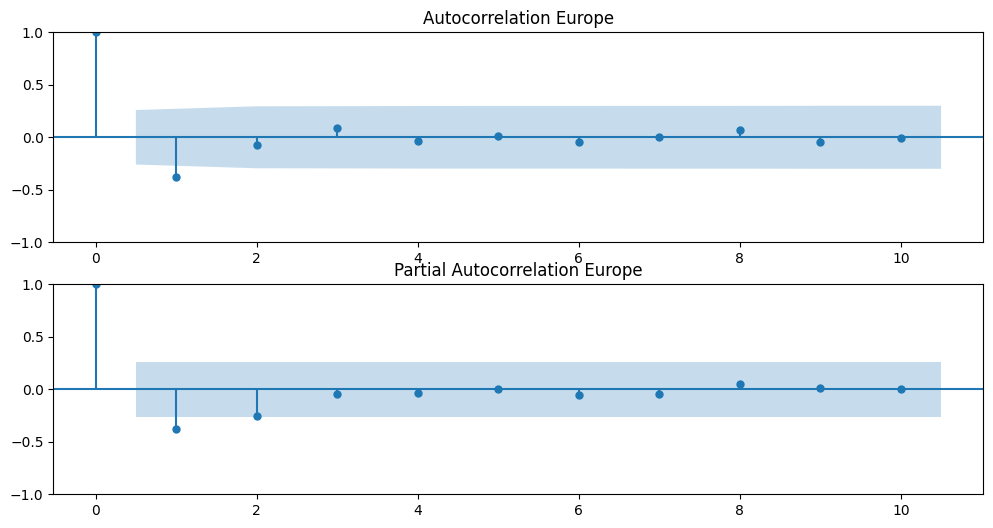

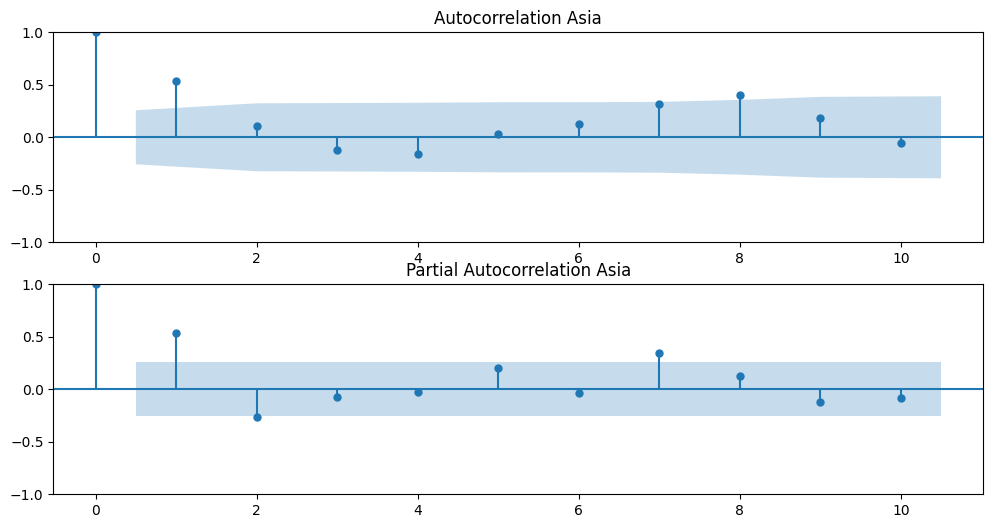

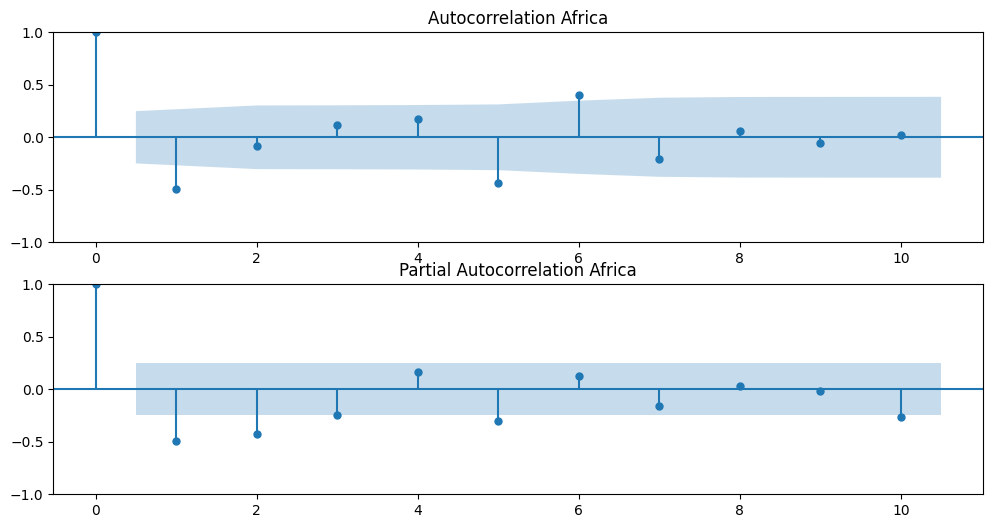

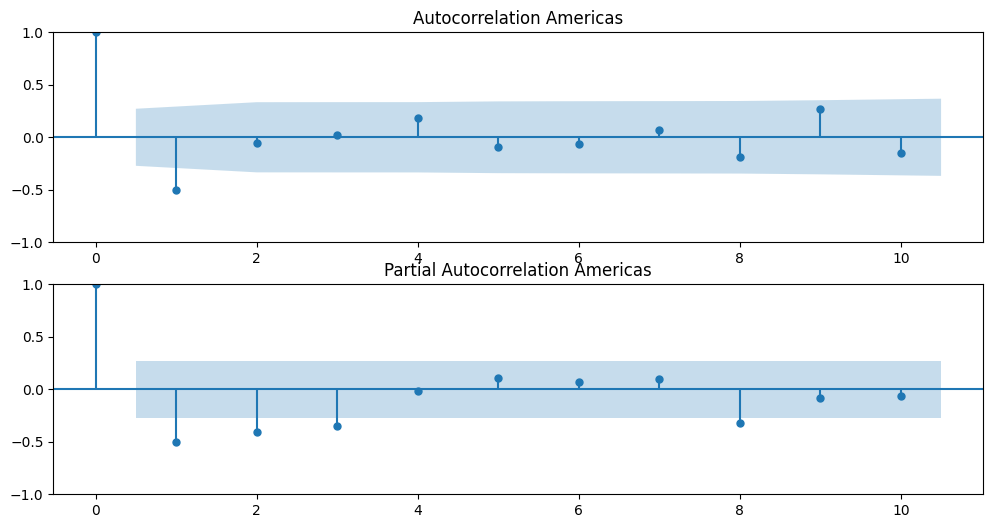

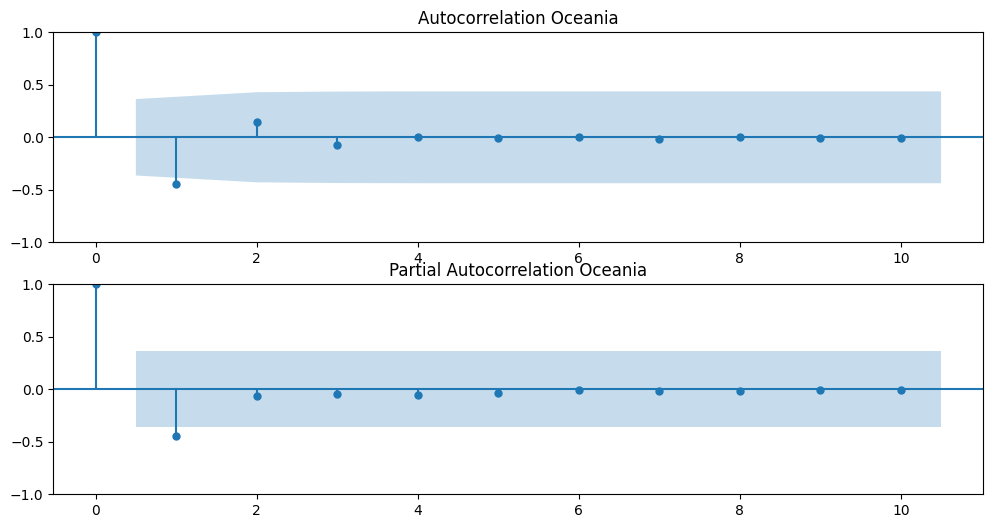

In [9]:
# Aplicar la tercera diferenciación
total_diff = total['Total forced displacements'].diff().diff().diff().dropna()
europe_diff = europe['Total forced displacements'].diff().diff().diff().dropna()
asi_diff = asia['Total forced displacements'].diff().dropna() 
africa_diff = africa['Total forced displacements'].diff().diff().dropna()
americas_diff = americas['Total forced displacements'].diff().diff().dropna()
oceania_diff = oceania['Total forced displacements'].diff().diff().diff().dropna()
list_diff = [total_diff, europe_diff, asi_diff, africa_diff, americas_diff, oceania_diff] 

list_cont_names = ['Total','Europe', 'Asia', 'Africa', 'Americas', 'Oceania']

for cont, cont_name in zip(list_diff, list_cont_names):
# Graficar la autocorrelación y autocorrelación parcial
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plot_acf(cont, lags=10, ax=plt.gca(), title='Autocorrelation'+ ' ' + cont_name)

    plt.subplot(2, 1, 2)
    plot_pacf(cont, lags=10, ax=plt.gca(), title='Partial Autocorrelation'+ ' ' + cont_name)

    plt.show()


In [10]:
#Anotamos los valores de p y q que nos parecen adecuados para cada continente:
total_values = (2,3,1)
europe_values =(2,3,1)
asia_values = (3,1,2)
africa_values=(5,2,3)
america_values = (4,2,1)
oceania_values=(1,1,1)

c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Total
                                   SARIMAX Results                                    
Dep. Variable:     Total forced displacements   No. Observations:                   73
Model:                         ARIMA(2, 3, 1)   Log Likelihood               -1144.453
Date:                        Mon, 27 Nov 2023   AIC                           2296.906
Time:                                12:23:31   BIC                           2305.900
Sample:                                     0   HQIC                          2300.479
                                         - 73                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6722      0.146     -4.589      0.000      -0.959      -0.385
ar.L2         -0.3606      0.308     -1.172      0.241      -

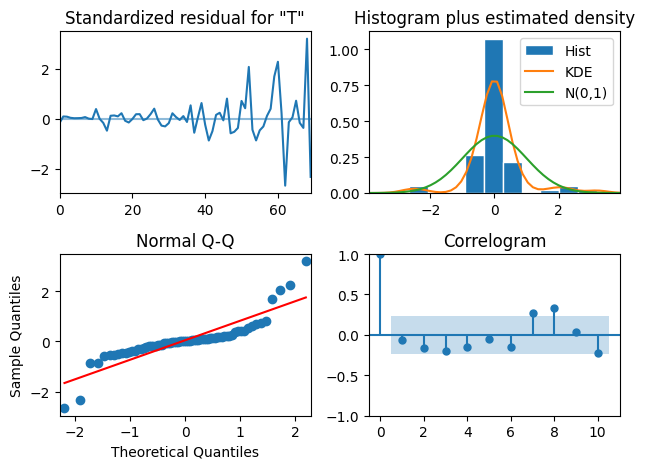

c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Europe
                                   SARIMAX Results                                    
Dep. Variable:     Total forced displacements   No. Observations:                   60
Model:                         ARIMA(1, 3, 1)   Log Likelihood                -892.401
Date:                        Mon, 27 Nov 2023   AIC                           1790.802
Time:                                12:23:32   BIC                           1796.931
Sample:                                     0   HQIC                          1793.184
                                         - 60                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9965      0.318     -3.133      0.002      -1.620      -0.373
ma.L1         -0.9492      0.295     -3.220      0.001      

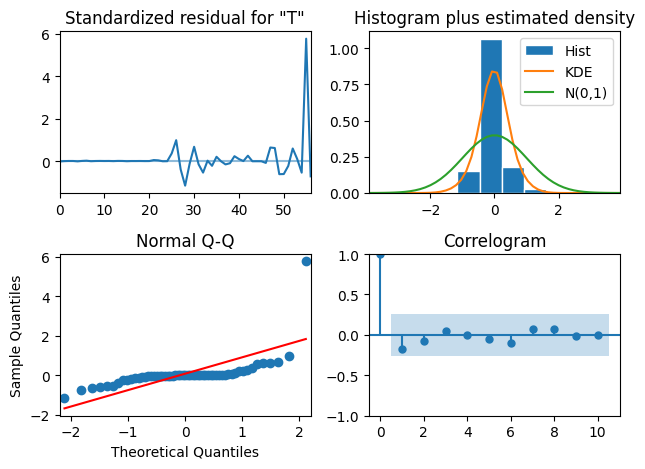

c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ioana

Asia
                                   SARIMAX Results                                    
Dep. Variable:     Total forced displacements   No. Observations:                   59
Model:                         ARIMA(3, 1, 3)   Log Likelihood                -889.664
Date:                        Mon, 27 Nov 2023   AIC                           1793.328
Time:                                12:23:33   BIC                           1807.752
Sample:                                     0   HQIC                          1798.947
                                         - 59                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8747      0.256     -3.412      0.001      -1.377      -0.372
ar.L2         -0.4708      0.265     -1.779      0.075      -0

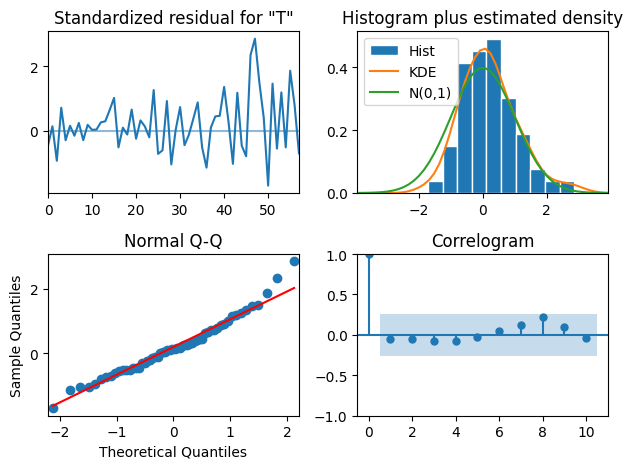

c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ioana

Africa
                                   SARIMAX Results                                    
Dep. Variable:     Total forced displacements   No. Observations:                   64
Model:                         ARIMA(4, 3, 2)   Log Likelihood                -934.003
Date:                        Mon, 27 Nov 2023   AIC                           1882.005
Time:                                12:23:35   BIC                           1896.781
Sample:                                     0   HQIC                          1887.796
                                         - 64                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2955      0.335     -3.873      0.000      -1.951      -0.640
ar.L2         -0.9476      0.371     -2.551      0.011      

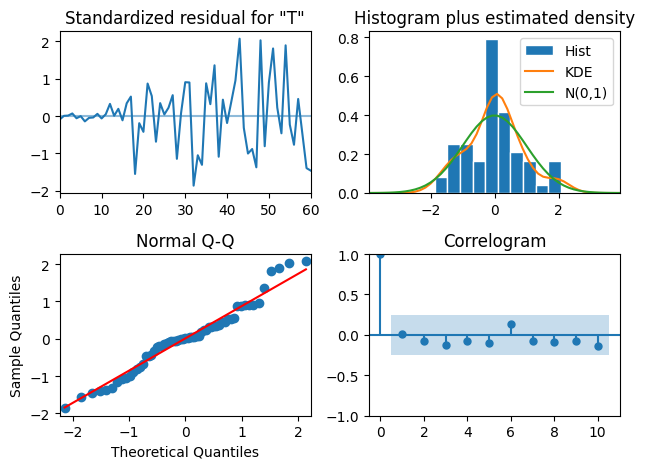

c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Americas
                                   SARIMAX Results                                    
Dep. Variable:     Total forced displacements   No. Observations:                   54
Model:                         ARIMA(3, 3, 1)   Log Likelihood                -757.665
Date:                        Mon, 27 Nov 2023   AIC                           1525.330
Time:                                12:23:39   BIC                           1534.989
Sample:                                     0   HQIC                          1529.021
                                         - 54                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0895      0.149     -7.334      0.000      -1.381      -0.798
ar.L2         -0.7785      0.215     -3.617      0.000    

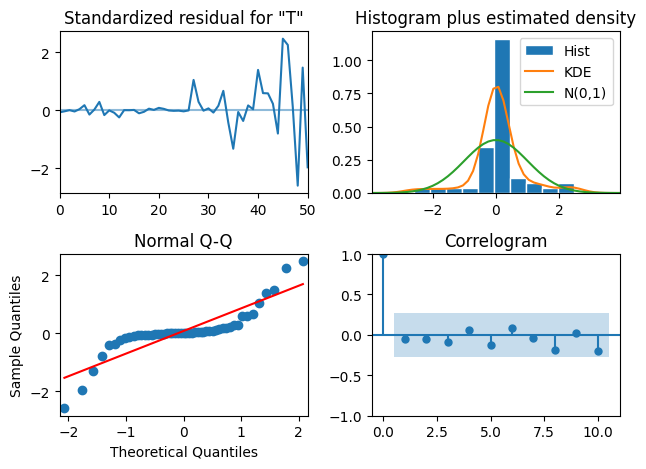

c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Oceania
                                   SARIMAX Results                                    
Dep. Variable:     Total forced displacements   No. Observations:                   32
Model:                         ARIMA(1, 1, 1)   Log Likelihood                -335.910
Date:                        Mon, 27 Nov 2023   AIC                            677.819
Time:                                12:23:40   BIC                            682.121
Sample:                                     0   HQIC                           679.222
                                         - 32                                         
Covariance Type:                          opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8916      1.282      0.696      0.487      -1.621       3.404
ma.L1         -0.6861      1.469     -0.467      0.640     

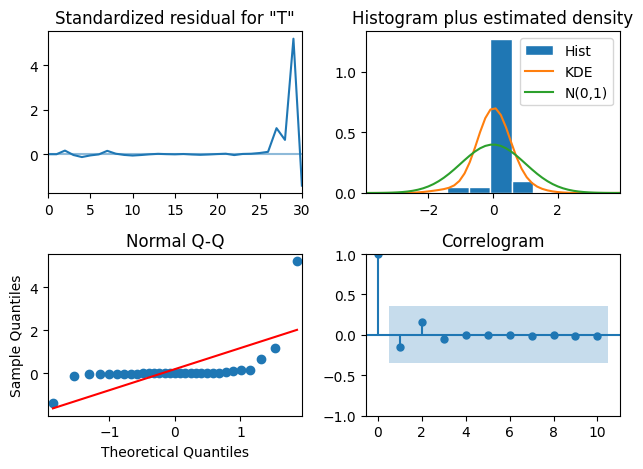

In [11]:
list_cont_values = [(2,3,1),(1, 3, 1), (3, 1, 3), (4, 3, 2), (3, 3, 1), (1, 1, 1)]
list_cont_names = ['Total','Europe', 'Asia', 'Africa', 'Americas', 'Oceania']
list_cont = [total,europe, asia, africa, americas, oceania]

for cont, cont_name, cont_values in zip(list_cont, list_cont_names, list_cont_values): 

    model = ARIMA(cont, order=cont_values)
    model_fit = model.fit()
    
    print(cont_name)
    print(model_fit.summary())
    print('')
    
    # Calcular el error
    model_fit.plot_diagnostics()
    plt.tight_layout()
    plt.show()

c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ioana\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ioana\AppData\Local

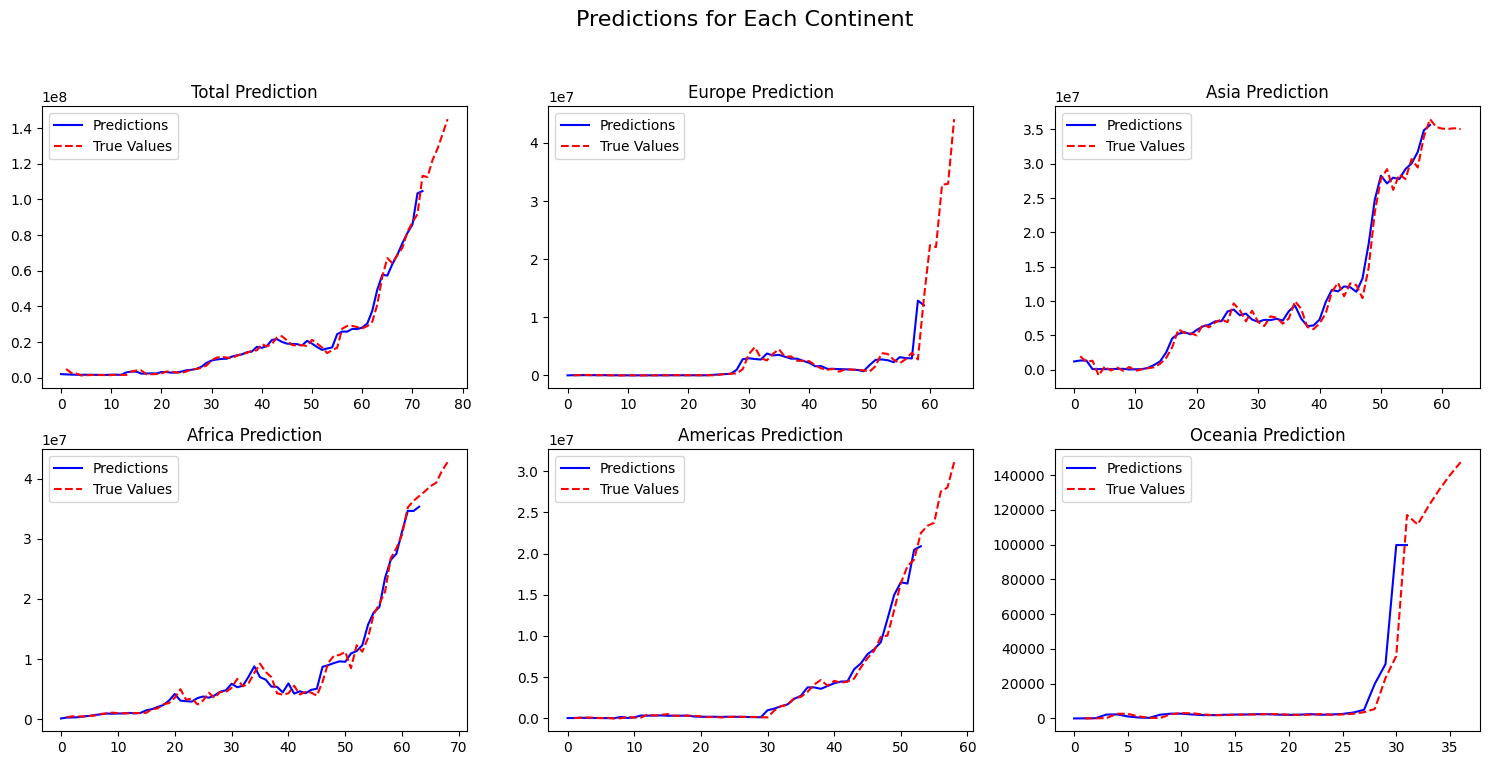

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Predictions for Each Continent', fontsize=16)

for idx, (cont, cont_name, cont_values) in enumerate(zip(list_cont, list_cont_names, list_cont_values)):
    model = ARIMA(cont, order=cont_values)
    model_fit = model.fit()

    predictions = model_fit.predict()

    ax = axes[idx//3, idx%3]
    ax.plot(range(len(cont)), cont.values, 'b-')
    ax.plot(range(1,len(cont)+5), pd.concat([predictions[1:],model_fit.forecast(5)]), 'r--')
    ax.set_title(f'{cont_name} Prediction')
    ax.legend(['Predictions', 'True Values'])


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
